## EDA

In [1]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings; warnings.simplefilter('ignore')
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

## Data Hate Speech

In [43]:
data = pd.read_json('./NLP_Models/data/dataHateClean.json')

In [5]:
data.head()

,created_at,date,time,user_id,username,name,text,mentions,urls,photos,...,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,Label,cleaned_text
0,2021-06-04 11:23:52 SE Asia Standard Time,2021-06-04,11:23:52,980982152786427904,dhejan_alfa13,dhejan alfa77,@taufik06644475 @tijabar nah ini tolol yg bole...,[],[],[],...,,,,,,,"[{'screen_name': 'Taufik06644475', 'name': 'Ta...",,-1,tolol berangkat haji negara negara mayoritas n...
1,2021-06-04 09:24:21 SE Asia Standard Time,2021-06-04,09:24:21,1291974491547922434,ayah__hanita,🇲🇨Buzzer_NKRI✊🇲🇨❤️,"biar setan, kadrun, politikus busuk &amp; peng...",[],[],[https://pbs.twimg.com/media/E3ASOpvVoAIE6UI.jpg],...,,,,,,,[],,-1,setan kadrun politikus busuk tolol nkri lari b...
2,2021-06-04 08:53:53 SE Asia Standard Time,2021-06-04,08:53:53,1334180999194767362,cyberkn__,Cyber KN16H7,@dahlia93362963 @abu_ar_rayyan @sukurwong @neg...,[],[],[],...,,,,,,,"[{'screen_name': 'dahlia93362963', 'name': 'da...",,-1,bipang year tolol permanen ngeyel karakter bip...
3,2021-06-04 08:43:41 SE Asia Standard Time,2021-06-04,08:43:41,1334180999194767362,cyberkn__,Cyber KN16H7,😂 bipang of the year udah tolol permanen ngeye...,[],[],[],...,,,,,,,[],,-1,bipang year tolol permanen ngeyel viralin bodo...
4,2021-06-04 08:40:51 SE Asia Standard Time,2021-06-04,08:40:51,1397542615919128578,erwinshah19,Erwin Shah,@goblokkadrun @herlin_673yp @ari3pras @ferdina...,[],[],[https://pbs.twimg.com/media/E3AIRmZVIAQJigD.jpg],...,,,,,,,"[{'screen_name': 'GoblokKadrun', 'name': 'Kadr...",,-1,makan bipang ambawang cebong goblok tolol


In [10]:
# Tipe Datanya : DataFrame (df)
print(type(data))
# Ukuran Data
N, P = data.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 8117, ', Kolom = ', 27)

In [11]:
data.keys()

Index(['created_at', 'date', 'time', 'user_id', 'username', 'name', 'text',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link', 'retweet', 'quote_url', 'near',
       'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'Label', 'cleaned_text'],
      dtype='object')

### Mengecek tweet dengan jumlah likes, replies dan retweets tertinggi

In [13]:
cekdata = data[['username', 'tweet', 'likes_count', 'replies_count', 'retweets_count']]

### Likes

In [27]:
#2 Tweet dengan nilai Likes tertinggi
cekdata.nlargest(2, 'likes_count')

,username,tweet,likes_count,replies_count,retweets_count
5834,msaid_didu,Izinkan #sayaketawa. Dirjen itu jabatan struk...,3359,188,1209
4126,katrinadewii,Banyak Cebong Nanya Prestasi Prabowo..Pertanya...,1643,136,901


In [20]:
cekdata['tweet'][5834]

'Izinkan #sayaketawa.  Dirjen itu jabatan struktural yg diangkat oleh Presiden. Kalau dipindahkan ke jabatan fungsional artinya dicopot dari jabatan Dirjen. Semoga kami semua belum tolol dan tidak akan jadi terlalu tolol'

### Replies

In [30]:
#2 Tweet dengan nilai Replies tertinggi
cekdata.nlargest(2, 'replies_count')

,username,tweet,likes_count,replies_count,retweets_count
3618,teddygusnaidi,Ketika gue menampilkan fakta dan menunggu bant...,672,445,231
5834,msaid_didu,Izinkan #sayaketawa. Dirjen itu jabatan struk...,3359,188,1209


In [32]:
cekdata['tweet'][3618]

'Ketika gue menampilkan fakta dan menunggu bantahan dari kelompok Prabowo, jawaban yang gue dapat adalah:  1. Basi,  2. wkwkwkw,  3. Payah lu,  4. Fitnah,  5. Dungu,  6. Tolol,  7. Cebong, 8. Babi 9. Bangsat 10. Dan makian lainnya.. 😄  #BuzzerKenyang'

### Retweets

In [34]:
#2 Tweet dengan nilai retweets tertinggi
cekdata.nlargest(2, 'retweets_count')

,username,tweet,likes_count,replies_count,retweets_count
5834,msaid_didu,Izinkan #sayaketawa. Dirjen itu jabatan struk...,3359,188,1209
4126,katrinadewii,Banyak Cebong Nanya Prestasi Prabowo..Pertanya...,1643,136,901


In [35]:
cekdata['tweet'][5834]

'Izinkan #sayaketawa.  Dirjen itu jabatan struktural yg diangkat oleh Presiden. Kalau dipindahkan ke jabatan fungsional artinya dicopot dari jabatan Dirjen. Semoga kami semua belum tolol dan tidak akan jadi terlalu tolol'

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      8117 non-null   object        
 1   date            8117 non-null   datetime64[ns]
 2   time            8117 non-null   object        
 3   user_id         8117 non-null   int64         
 4   username        8117 non-null   object        
 5   name            8117 non-null   object        
 6   text            8117 non-null   object        
 7   mentions        8117 non-null   object        
 8   urls            8117 non-null   object        
 9   photos          8117 non-null   object        
 10  replies_count   8117 non-null   int64         
 11  retweets_count  8117 non-null   int64         
 12  likes_count     8117 non-null   int64         
 13  hashtags        8117 non-null   object        
 14  link            8117 non-null   object        
 15  retw

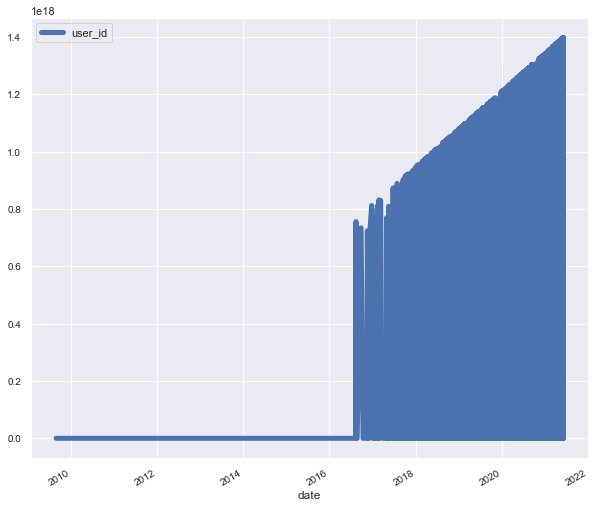

In [52]:
#time = pd.DataFrame(data)

time.date = pd.to_datetime(time.date)
time.plot.line(x='date', y='user_id', figsize=(10,9), linewidth=5, fontsize=10)
plt.show()

Ujaran kebencian di twitter terus meningkat setiap tahunnya, tahun 2021 saat ini menjadi tahun tertinggi dari banyaknya hatespeech di twitter.

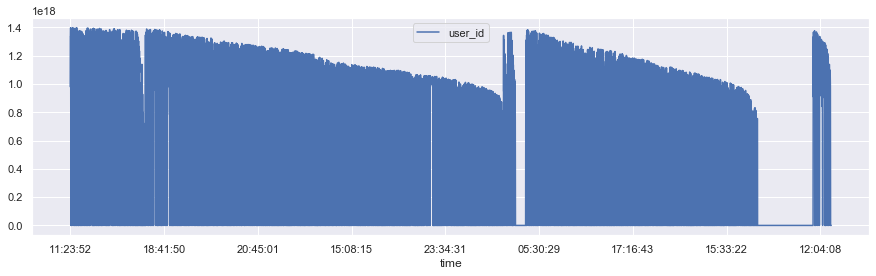

In [48]:
data.plot(x="time", y='user_id', figsize=(15,4))

Waktu terbanyak yang memuat data ujaran kebencian di twitter adalah pada siang hari dan pagi hari.

In [1]:
#data.plot(x="mentions", figsize=(15,4))

In [53]:
import string
import nltk

### Non Hate Speech

In [2]:
datanhs = pd.read_json('./NLP_Models/data/dataNonHate.json')

In [3]:
datanhs.head()

,created_at,date,time,user_id,username,name,tweet,mentions,urls,photos,...,quote_url,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,Label
0,2021-06-05 22:05:27 SE Asia Standard Time,2021-06-05,22:05:27,1331851918998532096,nuchano,nurul ✰,@aurumstay @schfess semangat yaa key!! 😆💗 semo...,[],[],[https://pbs.twimg.com/tweet_video_thumb/E3IKA...,...,,,,,,,,"[{'screen_name': 'aurumstay', 'name': 'Keiynni...",,1
1,2021-06-05 21:29:34 SE Asia Standard Time,2021-06-05,21:29:34,1268646569907118080,c7hl94,njaa,"apa yg buat gw kek gini, gw cerita walaupun it...",[],[],[],...,,,,,,,,[],,1
2,2021-06-05 20:32:03 SE Asia Standard Time,2021-06-05,20:32:03,1223648728877191168,kysya041,Kaiko_chi04🍵🧁 - キレイサカ,"@zahraaysha_ Huhuhu.. iya, aku cuma kurang mot...",[],[],[],...,,,,,,,,"[{'screen_name': 'zahraaysha_', 'name': 'Safin...",,1
3,2021-06-05 19:32:58 SE Asia Standard Time,2021-06-05,19:32:58,1378447450596249602,kangjoonmin,Kang Joon-min,@schfess Tetap semangat 🔥. Aku juga dulu pas p...,[],[],[],...,,,,,,,,"[{'screen_name': 'schfess', 'name': 'SCHFESS',...",,1
4,2021-06-05 19:31:44 SE Asia Standard Time,2021-06-05,19:31:44,738699002,kevin_gotama,Kevin Gotama 吴信杰,Aku ada pantun buat @gabyJKT48 ...,"[{'screen_name': 'gabyjkt48', 'name': 'gabriel...",[],[],...,,,,,,,,[],,1


In [6]:
# Tipe Datanya : DataFrame (df)
print(type(datanhs))
# Ukuran Data
N, P = datanhs.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 6700, ', Kolom = ', 26)

In [7]:
datanhs.keys()

Index(['created_at', 'date', 'time', 'user_id', 'username', 'name', 'tweet',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link', 'retweet', 'quote_url', 'near',
       'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'Label'],
      dtype='object')

### Mengecek tweet dengan jumlah likes, replies dan retweets tertinggi

In [9]:
cekdatanhs = datanhs[['username', 'tweet', 'likes_count', 'replies_count', 'retweets_count']]

### Likes

In [10]:
#2 Tweet dengan nilai Likes tertinggi
cekdatanhs.nlargest(2, 'likes_count')

,username,tweet,likes_count,replies_count,retweets_count
2709,likechizu,"Yang masih sekolah dan kuliah, semangat terus ...",10133,638,1558
4370,xxxbyefelicia,Zaman akak sekolah dulu cop tiang adalah sejen...,4292,20,3224


In [12]:
cekdatanhs['tweet'][2709]

'Yang masih sekolah dan kuliah, semangat terus buat kita yaa!! Semoga bisa lulus dengan hasil yang memuaskan!!'

### Replies

In [13]:
#2 Tweet dengan nilai Replies tertinggi
cekdatanhs.nlargest(2, 'replies_count')

,username,tweet,likes_count,replies_count,retweets_count
2709,likechizu,"Yang masih sekolah dan kuliah, semangat terus ...",10133,638,1558
6376,convomf,kalian udah bisa masak apa aja? 💭,4,152,0


In [15]:
cekdatanhs['tweet'][2709]

'Yang masih sekolah dan kuliah, semangat terus buat kita yaa!! Semoga bisa lulus dengan hasil yang memuaskan!!'

### Retweets

In [16]:
#2 Tweet dengan nilai retweets tertinggi
cekdatanhs.nlargest(2, 'retweets_count')

,username,tweet,likes_count,replies_count,retweets_count
4370,xxxbyefelicia,Zaman akak sekolah dulu cop tiang adalah sejen...,4292,20,3224
2709,likechizu,"Yang masih sekolah dan kuliah, semangat terus ...",10133,638,1558


In [18]:
cekdatanhs['tweet'][4370]

'Zaman akak sekolah dulu cop tiang adalah sejenis extreme sport. Ada yang patah gigi tersembam, akak bersimen kaki sebulan sbb cop tiang. Ada yang seliuh tangan.  Aktiviti yang memerlukan ketangkasan, semangat berpasukan dan kepercayaan. Tibahhh. Running Man patut try main.'

In [19]:
datanhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      6700 non-null   object        
 1   date            6700 non-null   datetime64[ns]
 2   time            6700 non-null   object        
 3   user_id         6700 non-null   int64         
 4   username        6700 non-null   object        
 5   name            6700 non-null   object        
 6   tweet           6700 non-null   object        
 7   mentions        6700 non-null   object        
 8   urls            6700 non-null   object        
 9   photos          6700 non-null   object        
 10  replies_count   6700 non-null   int64         
 11  retweets_count  6700 non-null   int64         
 12  likes_count     6700 non-null   int64         
 13  hashtags        6700 non-null   object        
 14  link            6700 non-null   object        
 15  retw

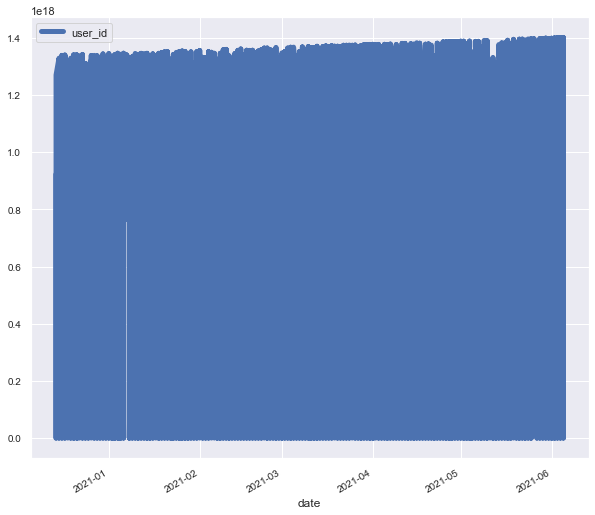

In [20]:
time = pd.DataFrame(datanhs)

time.date = pd.to_datetime(time.date)
time.plot.line(x='date', y='user_id', figsize=(10,9), linewidth=5, fontsize=10)
plt.show()

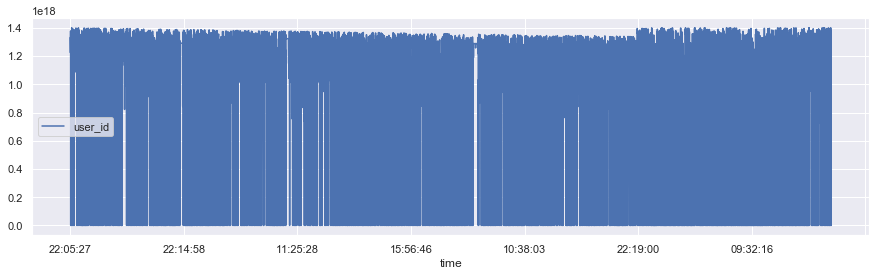

In [21]:
datanhs.plot(x="time", y='user_id', figsize=(15,4))